In [2]:
from datascience import *
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plots

In [3]:
genetics = Table.read_table('https://raw.githubusercontent.com/AUP-CS2091/class/master/week3/galton.csv')
cones = Table.read_table('https://raw.githubusercontent.com/AUP-CS2091/class/master/week1/cones.csv')
nba = Table.read_table('https://raw.githubusercontent.com/AUP-CS2091/class/master/week1/nba_salaries.csv').relabeled(3, 'SALARY')

In [10]:
genetics.where('midparentHeight', are.between(73.66-0.5,73.66+0.5)).show(30)

family,father,mother,midparentHeight,children,childNum,gender,childHeight
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
6,74,68,73.72,1,1,female,69.5
7,74,68,73.72,6,1,male,76.5
7,74,68,73.72,6,2,male,74
7,74,68,73.72,6,3,male,73
7,74,68,73.72,6,4,male,73
7,74,68,73.72,6,5,female,70.5


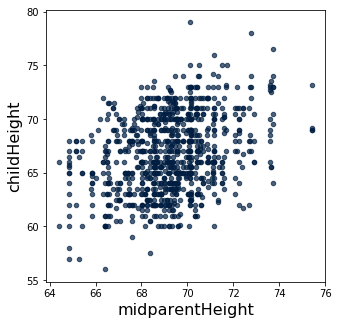

In [5]:
genetics.scatter('midparentHeight', 'childHeight')

In [8]:
genetics.where('midparentHeight', are.between(73.66-0.5,73.66+0.5)).column('childHeight').mean()

70.41578947368421

In [11]:
def predict(midHeight):
    return genetics.where('midparentHeight', are.between(midHeight-0.5,midHeight+0.5)).column('childHeight').mean()

In [13]:
predictions = genetics.with_column('predictions', genetics.apply(predict, 'midparentHeight'))

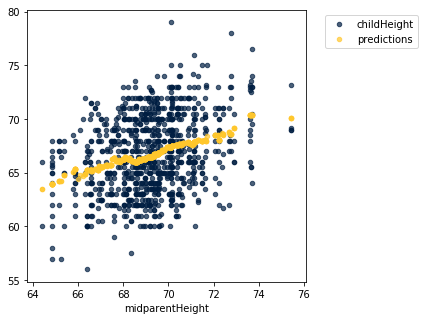

In [15]:
predictions.select('midparentHeight', 'childHeight','predictions').scatter('midparentHeight')

In [16]:
def better_predict(midHeight, gender):
    return genetics.where('gender',gender).where('midparentHeight', are.between(midHeight-0.5,midHeight+0.5)).column('childHeight').mean()

In [17]:
better_predictions = predictions.with_column('better predictions', genetics.apply(better_predict, 'midparentHeight', 'gender'))

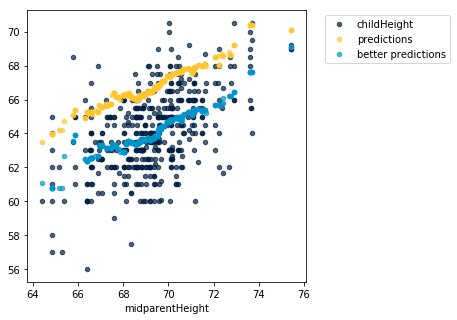

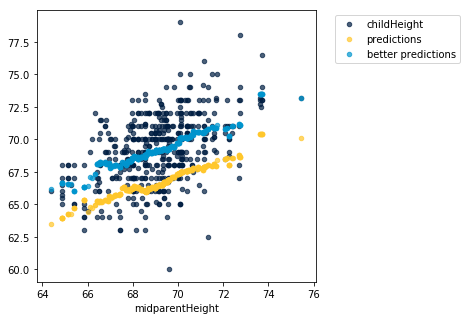

In [20]:
better_predictions.where('gender','female').select('midparentHeight', 'childHeight','predictions', 'better predictions').scatter('midparentHeight')
better_predictions.where('gender','male').select('midparentHeight', 'childHeight','predictions', 'better predictions').scatter('midparentHeight')

In [21]:
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [22]:
cones.group('Flavor')

Flavor,count
bubblegum,1
chocolate,3
strawberry,2


In [23]:
cones.group('Flavor', len)

Flavor,Color len,Price len
bubblegum,1,1
chocolate,3,3
strawberry,2,2


In [24]:
cones.group('Flavor', np.average)

Flavor,Color average,Price average
bubblegum,,4.75
chocolate,,5.08333
strawberry,,4.4


In [25]:
cones.group('Flavor', max)

Flavor,Color max,Price max
bubblegum,pink,4.75
chocolate,light brown,5.25
strawberry,pink,5.25


In [26]:
cones.group('Flavor', sum)

Flavor,Color sum,Price sum
bubblegum,,4.75
chocolate,,15.25
strawberry,,8.8


In [31]:
cones.group(['Flavor', 'Color'], max)

Flavor,Color,Price max
bubblegum,pink,4.75
chocolate,dark brown,5.25
chocolate,light brown,4.75
strawberry,pink,5.25


In [32]:
cones.pivot('Flavor', 'Color', values='Price', collect=max)

Color,bubblegum,chocolate,strawberry
dark brown,0,5.25,0
light brown,0,4.75,0
pink,4.75,0,5.25


In [33]:
nba

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


In [36]:
nba.pivot('TEAM','POSITION', values='SALARY', collect=max)

POSITION,Atlanta Hawks,Boston Celtics,Brooklyn Nets,Charlotte Hornets,Chicago Bulls,Cleveland Cavaliers,Dallas Mavericks,Denver Nuggets,Detroit Pistons,Golden State Warriors,Houston Rockets,Indiana Pacers,Los Angeles Clippers,Los Angeles Lakers,Memphis Grizzlies,Miami Heat,Milwaukee Bucks,Minnesota Timberwolves,New Orleans Pelicans,New York Knicks,Oklahoma City Thunder,Orlando Magic,Philadelphia 76ers,Phoenix Suns,Portland Trail Blazers,Sacramento Kings,San Antonio Spurs,Toronto Raptors,Utah Jazz,Washington Wizards
C,12,2.61698,1.3629,13.5,13.4,14.2609,5.2,5.6135,6.5,13.8,22.3594,4,1.1006,15.5922,19.688,0,2.10929,12.1,9.21348,12.65,16.4075,11.25,4.62696,13,6.9808,15.852,7.5,4.66048,2.9,13
PF,18.6717,5,11.236,7,5.54373,19.689,15.4937,11.236,0,14.2609,2.48953,4.05,18.9077,3.13224,9.63856,22.1927,5.15244,8.5,8.5,4.13172,12.25,8.19303,6.5,5.5,3.07588,0,19.689,6.26867,4.775,8
PG,8,7.73034,6.3,12,20.0931,16.4075,5.37897,4.345,13.913,11.3708,12.4045,7,21.4687,5.10312,9.58843,14.783,6.6,12.7,10.5955,7.40281,16.7442,8.3445,2.14477,13.5,4.23629,9.5,13.4375,12,3.77772,15.852
SF,4,6.79612,24.8949,6.3314,2.38044,22.9705,15.3615,14,2.84196,11.7105,8.19303,17.1201,3.376,25,9.45,10.1516,1.95396,2.05692,3.38202,22.875,20.1586,16,10.1059,5.5,8.04289,12.4031,16.4075,13.6,15.4096,5.6135
SG,5.74648,3.42551,3.42551,13.1253,16.4075,8.98876,1.449,1.58448,6.27,15.501,15.7564,10.3,7.085,7,5.15854,20,14.7,7.085,15.514,8,5.13843,5.19252,2.86944,2.12784,6,6.06061,10,10.05,9.46348,5.69467


In [38]:
nba.select('TEAM','POSITION','SALARY').group(['TEAM','POSITION'],max)

TEAM,POSITION,SALARY max
Atlanta Hawks,C,12
Atlanta Hawks,PF,18.6717
Atlanta Hawks,PG,8
Atlanta Hawks,SF,4
Atlanta Hawks,SG,5.74648
Boston Celtics,C,2.61698
Boston Celtics,PF,5
Boston Celtics,PG,7.73034
Boston Celtics,SF,6.79612
Boston Celtics,SG,3.42551


In [41]:
nba.select('TEAM','POSITION','SALARY').group(['TEAM','POSITION'], max)

TEAM,POSITION,SALARY max
Atlanta Hawks,C,12
Atlanta Hawks,PF,18.6717
Atlanta Hawks,PG,8
Atlanta Hawks,SF,4
Atlanta Hawks,SG,5.74648
Boston Celtics,C,2.61698
Boston Celtics,PF,5
Boston Celtics,PG,7.73034
Boston Celtics,SF,6.79612
Boston Celtics,SG,3.42551


In [60]:
nba.where('TEAM', 'Atlanta Hawks').where('POSITION', 'C').sort('SALARY', descending=True).column(0).item(0)

'Al Horford'

In [61]:
def starter(team, position):
    return nba.where('TEAM', team).where('POSITION', position).sort('SALARY', descending=True).column(0).item(0)



In [63]:
nba = nba.with_column('starter', nba.apply(starter, 'TEAM', 'POSITION'))

In [65]:
nba.pivot('TEAM', 'POSITION', values='starter', collect=max)

POSITION,Atlanta Hawks,Boston Celtics,Brooklyn Nets,Charlotte Hornets,Chicago Bulls,Cleveland Cavaliers,Dallas Mavericks,Denver Nuggets,Detroit Pistons,Golden State Warriors,Houston Rockets,Indiana Pacers,Los Angeles Clippers,Los Angeles Lakers,Memphis Grizzlies,Miami Heat,Milwaukee Bucks,Minnesota Timberwolves,New Orleans Pelicans,New York Knicks,Oklahoma City Thunder,Orlando Magic,Philadelphia 76ers,Phoenix Suns,Portland Trail Blazers,Sacramento Kings,San Antonio Spurs,Toronto Raptors,Utah Jazz,Washington Wizards
C,Al Horford,Tyler Zeller,Andrea Bargnani,Al Jefferson,Joakim Noah,Tristan Thompson,Zaza Pachulia,JJ Hickson,Aron Baynes,Andrew Bogut,Dwight Howard,Ian Mahinmi,Cole Aldrich,Roy Hibbert,Marc Gasol,,Miles Plumlee,Nikola Pekovic,Omer Asik,Robin Lopez,Enes Kanter,Nikola Vucevic,Joel Embiid,Tyson Chandler,Ed Davis,DeMarcus Cousins,Boris Diaw,Jonas Valanciunas,Tibor Pleiss,Nene Hilario
PF,Paul Millsap,Jonas Jerebko,Thaddeus Young,Marvin Williams,Nikola Mirotic,Kevin Love,David Lee,Kenneth Faried,,Draymond Green,Terrence Jones,Lavoy Allen,Blake Griffin,Julius Randle,Zach Randolph,Chris Bosh,Jabari Parker,Kevin Garnett,Ryan Anderson,Kristaps Porzingis,Serge Ibaka,Channing Frye,Carl Landry,Mirza Teletovic,Meyers Leonard,,LaMarcus Aldridge,Patrick Patterson,Trevor Booker,Markieff Morris
PG,Jeff Teague,Avery Bradley,Jarrett Jack,Kemba Walker,Derrick Rose,Kyrie Irving,Deron Williams,Jameer Nelson,Reggie Jackson,Stephen Curry,Ty Lawson,Rodney Stuckey,Chris Paul,D'Angelo Russell,Mike Conley,Goran Dragic,Greivis Vasquez,Ricky Rubio,Jrue Holiday,Jose Calderon,Russell Westbrook,Brandon Jennings,Kendall Marshall,Eric Bledsoe,Damian Lillard,Rajon Rondo,Tony Parker,Kyle Lowry,Dante Exum,John Wall
SF,Thabo Sefolosha,Jae Crowder,Joe Johnson,Michael Kidd-Gilchrist,Doug McDermott,LeBron James,Chandler Parsons,Danilo Gallinari,Stanley Johnson,Andre Iguodala,Trevor Ariza,Paul George,Paul Pierce,Kobe Bryant,Jeff Green,Luol Deng,Giannis Antetokounmpo,Shabazz Muhammad,Quincy Pondexter,Carmelo Anthony,Kevin Durant,Tobias Harris,Gerald Wallace,P.J. Tucker,Al-Farouq Aminu,Rudy Gay,Kawhi Leonard,DeMarre Carroll,Gordon Hayward,Martell Webster
SG,Kyle Korver,Evan Turner,Bojan Bogdanovic,Nicolas Batum,Jimmy Butler,Iman Shumpert,Justin Anderson,Gary Harris,Jodie Meeks,Klay Thompson,James Harden,Monta Ellis,J.J. Redick,Louis Williams,Tony Allen,Dwyane Wade,Khris Middleton,Kevin Martin,Eric Gordon,Arron Afflalo,Dion Waiters,Victor Oladipo,Nik Stauskas,Devin Booker,Gerald Henderson,Marco Belinelli,Danny Green,DeMar DeRozan,Alec Burks,Bradley Beal
